# Soham Maji, 2011162, Computational Physics- Endsem

In [58]:
from library import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('seaborn')

C:\Users\soham\AppData\Local\Temp\ipykernel_16616\1063503832.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


# Q.1

Text(0, 0.5, 'N')

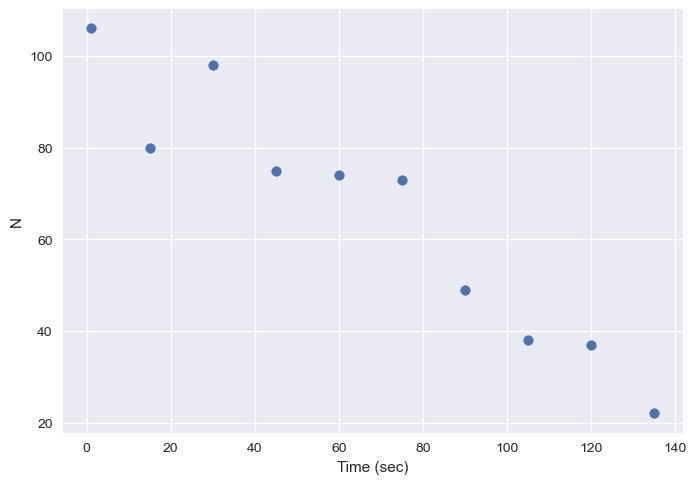

In [102]:
qs1data= np.loadtxt('endsemfit.txt')

t = qs1data[:, 0]  
N = qs1data[:, 1]  
sigma_ln_N = 1 / np.sqrt(N)  
plt.scatter(t, N)
plt.xlabel('Time (sec)')
plt.ylabel('N')


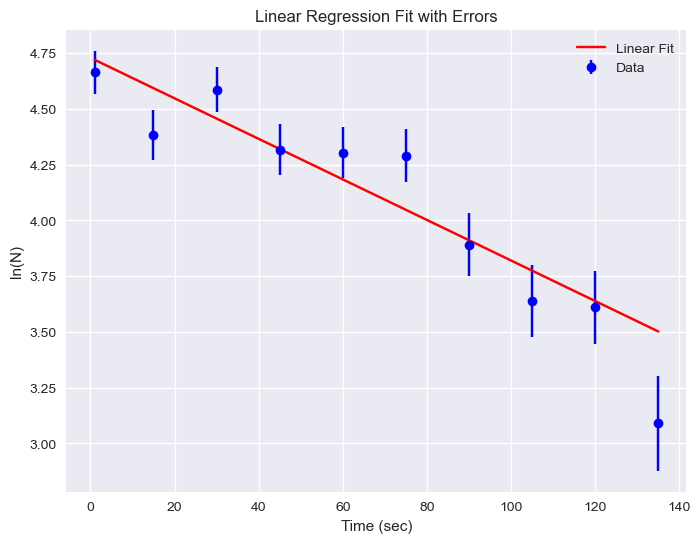

Lifetime (τ): 110.038 ± 12.235 seconds
χ² value: 15.373
Critical value (at 5% significance level) for df=8: 15.507
Is the fit acceptable at 5% level of significance? Yes


In [61]:
import numpy as np
import matplotlib.pyplot as plt

def linear_regression_with_errors(x, y, sigma_y):
    weights = 1 / (sigma_y ** 2)
    sum_weights = np.sum(weights)
    sum_weights_x = np.sum(weights * x)
    sum_weights_y = np.sum(weights * y)
    sum_weights_x_squared = np.sum(weights * x ** 2)
    sum_weights_xy = np.sum(weights * x * y)

    delta= sum_weights * sum_weights_x_squared - sum_weights_x ** 2

    slope = (sum_weights * sum_weights_xy - sum_weights_x * sum_weights_y) / delta
    intercept = (sum_weights_x_squared * sum_weights_y - sum_weights_x * sum_weights_xy) / delta

    std_err = np.sqrt(sum_weights / delta)

    return slope, intercept, std_err

def chi_squared(residuals, sigma):
    return np.sum((residuals / sigma) ** 2)



slope, intercept, std_err = linear_regression_with_errors(t, np.log(N), sigma_ln_N)

tau = -1 / slope


error_tau = std_err * (tau ** 2)


plt.figure(figsize=(8, 6))
plt.errorbar(t, np.log(N), yerr=sigma_ln_N, fmt='o', color='b', label='Data')
plt.plot(t, slope * t + intercept, color='r', label='Linear Fit')
plt.xlabel('Time (sec)')
plt.ylabel('ln(N)')
plt.title('Linear Regression Fit with Errors')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the χ² value
residuals = np.log(N) - (slope * t + intercept)
chi_squared_value = chi_squared(residuals, sigma_ln_N)
df = len(N) - 2  # Degrees of freedom

critical_value = chi2.ppf(0.95, df)

# Check if the fit is acceptable at 5% level of significance
fit_acceptable = chi_squared_value < critical_value

# Print results
print("Lifetime (τ): {:.3f} ± {:.3f} seconds".format(tau, error_tau))
print("χ² value: {:.3f}".format(chi_squared_value))
print("Critical value (at 5% significance level) for df={}: {:.3f}".format(df, critical_value))
print("Is the fit acceptable at 5% level of significance?", "Yes" if fit_acceptable else "No")


# Qs.2

In [62]:
def van_der_Waals_V(T, p, R, a, b, tol=1e-5):

    # Initial guess for V
    V_prev = R * T / p
    it=0
    # Fixed-point iteration
    while True:
        V_next = (R * T / (p + a / V_prev**2 * (V_prev - b)))**0.5 + b
        it = it+1
        if abs(V_next - V_prev) < tol:
            break
        V_prev = V_next
    
    return V_next, it

In [101]:


# Constants
T = 300  
b = 0.05422  
p = 5.95 
R = 0.0821  
a= 6.254  

# Compute volume V using fixed-point iteration
V, n = van_der_Waals_V(T, p, R, a, b)

print(f"Volume of Cl2: {V:.4f}L")


Volume of Cl2: 1.6557L


# Qs.4

In [100]:
# Define the Householder reflector function
def householder_reflector(v, tau):
    
    vvT = np.outer(v, v)
    P = np.eye(len(v)) - tau * vvT
    return P

v = np.array([1, 0])
x = np.array([1, 2])

tau = 2

P = householder_reflector(v, tau)

Px = np.dot(P, x)

print("Householder Reflector P:")
print(P)
print("\nReflected Vector Px:")
print(Px)


Householder Reflector P:
[[-1.  0.]
 [ 0.  1.]]

Reflected Vector Px:
[-1.  2.]


# Qs.5

In [38]:
A = np.loadtxt('endsemmat.txt')
A

array([[ 2., -1.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0., -1.,  2.]])

In [115]:
# Parameters
a = c = -1
b = 2
n = 5

def calculate_norm(x):
    return np.sqrt(np.sum(x ** 2))

# Function to perform power iteration
def power_iteration(A, num_iterations):
    # Initialize a random vector
    x = np.random.rand(A.shape[0])
    x_norm = calculate_norm(x)
    x = x / x_norm
    
    for _ in range(num_iterations):
        # Multiply A by x
        Ax = np.dot(A, x)
        
        # Normalize Ax
        Ax_norm = calculate_norm(Ax)
        x = Ax / Ax_norm
    
    # Compute eigenvalue
    eigenvalue = np.dot(x, Ax)
    
    return eigenvalue, x


# Calculate the first two largest eigenvalues and their corresponding eigenvectors
eigenvalues = []
eigenvectors = []

for k in range(2):
    eigenvalue, eigenvector = power_iteration(A, 1000)
    eigenvalues.append(eigenvalue)
    eigenvectors.append(eigenvector)

# Compute the theoretical values for eigenvalues and eigenvectors
lambda_k = lambda k: b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1))
v_ik = lambda i, k: 2 * (np.sqrt(a/c))**k * np.sin(i * k  * np.pi / (n + 1))


print("Calculated Eigenvalues:", eigenvalues)
print("Theoretical Eigenvalues:", [lambda_k(k) for k in range(2)])
print("")

for k in range(2):
    print("Calculated Eigenvector {}:".format(k+1))
    print(eigenvectors[k])
    print("")



Calculated Eigenvalues: [3.7320508075688776, 3.7320508075688767]
Theoretical Eigenvalues: [4.0, 3.7320508075688776]

Calculated Eigenvector 1:
[ 0.28867513 -0.5         0.57735027 -0.5         0.28867513]

Calculated Eigenvector 2:
[-0.28867513  0.5        -0.57735027  0.5        -0.28867513]



In [121]:
lambda_k = lambda k: 2 + 2 * np.cos(k * np.pi / 6)
v_ik = lambda i, k: 2 * np.sin(i * k  * np.pi / 6)
for k in range(6):
    print("Theoretical Eigenvector {}:".format(k+1))
    theoretical_eigenvector = [v_ik(i, k) for i in range(n)]
    print(theoretical_eigenvector)
    print("")


Theoretical Eigenvector 1:
[0.0, 0.0, 0.0, 0.0, 0.0]

Theoretical Eigenvector 2:
[0.0, 0.9999999999999999, 1.7320508075688772, 2.0, 1.7320508075688774]

Theoretical Eigenvector 3:
[0.0, 1.7320508075688772, 1.7320508075688774, 2.4492935982947064e-16, -1.732050807568877]

Theoretical Eigenvector 4:
[0.0, 2.0, 2.4492935982947064e-16, -2.0, -4.898587196589413e-16]

Theoretical Eigenvector 5:
[0.0, 1.7320508075688774, -1.732050807568877, -4.898587196589413e-16, 1.7320508075688783]

Theoretical Eigenvector 6:
[0.0, 0.9999999999999999, -1.7320508075688772, 2.0, -1.7320508075688774]



# Qs.6

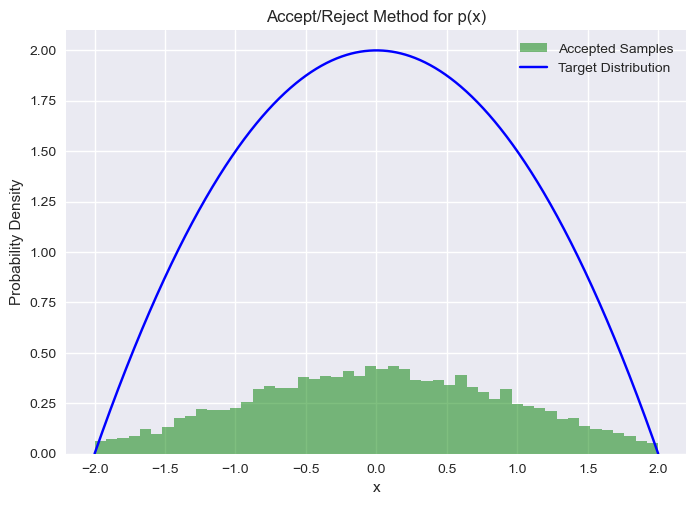

Success Probability: 0.9560


In [113]:
# Function to generate random numbers using accept/reject method
def generate_samples(num_samples, a):
    # Define the target distribution function
    p = lambda x: 0.5 * (a**2 - x**2) if abs(x) < a else 0
    
    # Define the proposal distribution function (standard normal distribution)
    g = np.random.normal
    
    M = 0.5 * (a**2 - (-a)**2)
    
    samples = []
    accepted_samples = []
    
    while len(accepted_samples) < num_samples:
        # Generate a random number from the proposal distribution
        x = g()
        
        # Generate a uniform random number between 0 and M
        u = np.random.uniform(0, M)
        
        # Check if the sample should be accepted
        if u < p(x):
            accepted_samples.append(x)
        
        samples.append(x)
    
    return accepted_samples, samples

# Parameters
num_samples = 10000
a = 2

# Generate random samples
accepted_samples, all_samples = generate_samples(num_samples, a)

# Plot the histogram of accepted samples
plt.hist(accepted_samples, bins=50, density=True, alpha=0.5, color='g', label='Accepted Samples')

# Plot the target distribution
x_values = np.linspace(-a, a, 1000)
p_values = 0.5 * (a**2 - x_values**2)
plt.plot(x_values, p_values, color='b', label='Target Distribution')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Accept/Reject Method for p(x)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate success probability
success_prob = len(accepted_samples) / len(all_samples)
print(f"Success Probability: {success_prob:.4f}")


# Qs.7

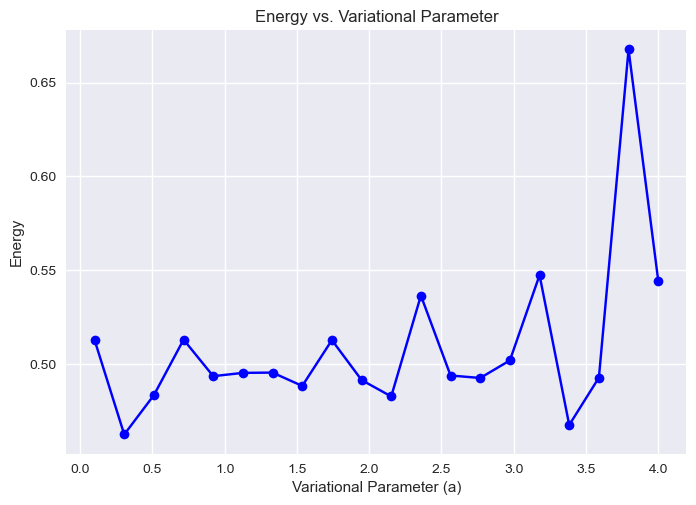

Minimum Energy: 0.46242820587263767
Optimal Variational Parameter (a): 0.30526315789473685


In [97]:
# Define the trial wavefunction p(x; a)
def trial_wavefunction(x, a):
    return 0.5 * (a**2 - x**2)

def potential_energy(x):
    return 0.5 * x**2

def metropolis_hastings(num_steps, a):
    x = 0  
    energies = []


    for _ in range(num_steps):
   
        x_new = np.random.normal(loc=x, scale=0.5)
        
        prob_accept = min(1, trial_wavefunction(x_new, a) / trial_wavefunction(x, a))

        if np.random.rand() < prob_accept:
            x = x_new
        
        # Calculate local energy and store
        local_energy = potential_energy(x) / trial_wavefunction(x, a)
        energies.append(local_energy)

    return np.mean(energies)

# Parameters
num_steps = 20000
num_a_values = 20
a_values = np.linspace(0.1, 4, num_a_values)  

# Perform VMC for each value of a
energies = []
for a in a_values:
    energy = metropolis_hastings(num_steps, a)
    energies.append(energy)

# Find the minimum energy and the corresponding optimal a value
min_energy = min(energies)
optimal_a = a_values[np.argmin(energies)]

# Plot the energy as a function of a
plt.plot(a_values, energies, marker='o', color='b', linestyle='-')
plt.xlabel('Variational Parameter (a)')
plt.ylabel('Energy')
plt.title('Energy vs. Variational Parameter')
plt.grid(True)
plt.show()

print("Minimum Energy:", min_energy)
print("Optimal Variational Parameter (a):", optimal_a)
